In [31]:
import math
import cv2
import numpy as np
import time
import mediapipe as mp
import matplotlib.pyplot as plt
import os

In [32]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

In [33]:
mp_pose = mp.solutions.pose

pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# tracker = cv2.TrackerCSRT_create()

mp_drawing = mp.solutions.drawing_utils

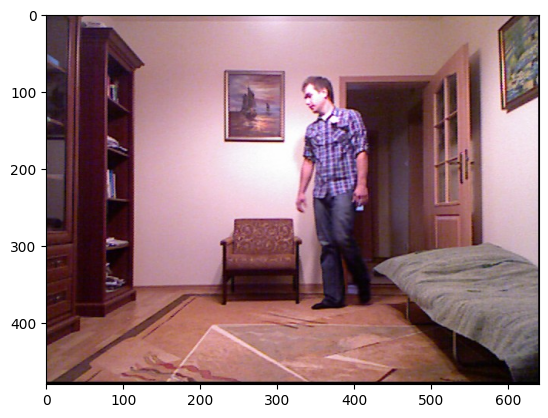

In [34]:
img = 'ufall_dataset/adl-03-cam0-rgb/adl-03-cam0-rgb-055'
sample_image = cv2.imread(os.path.join(img+'.png'))

# sample_image = cv2.imread('image.jpg')

plt.imshow(sample_image[:,:,::-1])

# plt.show()

In [35]:
results = pose.process(cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB))

# if results.pose_landmarks:
#     for i in range(5):
        
#         print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

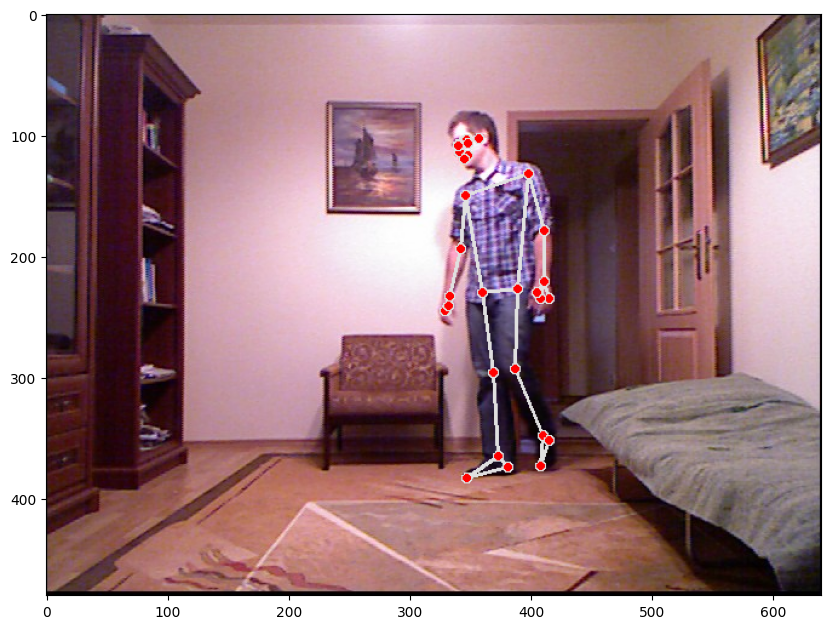

In [36]:
img_copy = sample_image.copy()

if results.pose_landmarks:
    
    mp_drawing.draw_landmarks(image=img_copy, landmark_list = results.pose_landmarks, connections = mp_pose.POSE_CONNECTIONS)
    
    plt.figure(figsize = [10,10])
    plt.imshow(img_copy[:,:,::-1]);
    
    plt.show();


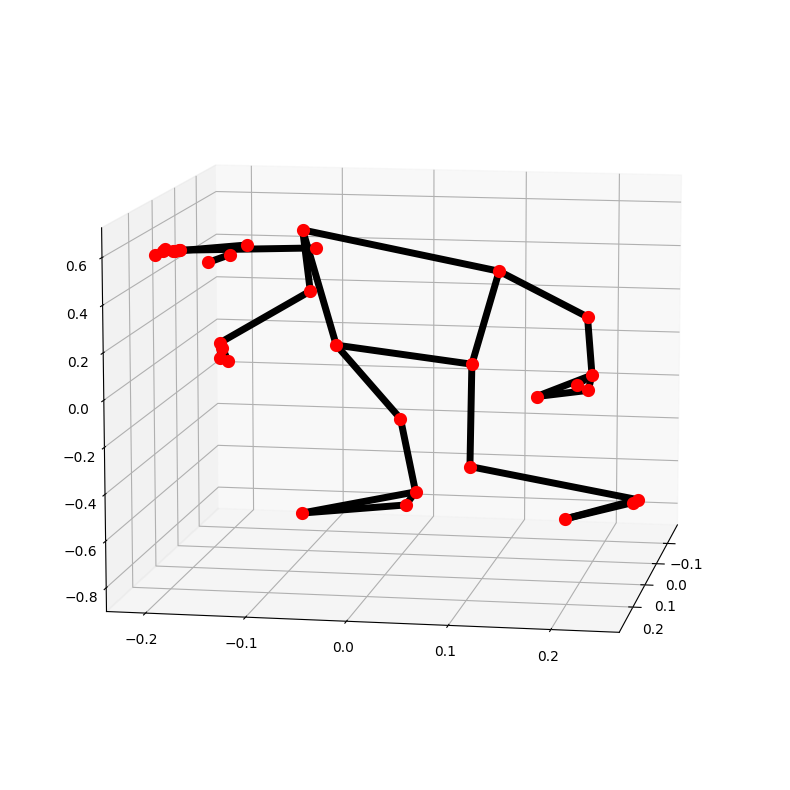

In [37]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS) 

In [38]:
def Posedetection(image,pose,display=False):
    img_copy = image.copy()
    
    img_RGB = cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)
    
    results = pose.process(img_RGB)
    
    h,w,d = image.shape
    
    l = []
    flattened_keypoints = []
    ls = []
    
    if results.pose_landmarks:
    
        mp_drawing.draw_landmarks(image=img_copy, landmark_list = results.pose_landmarks, connections = mp_pose.POSE_CONNECTIONS)
        
        
        for landmark in results.pose_landmarks.landmark:
            
            l.append([int(landmark.x * w),int(landmark.y * h),int(landmark.z * w)])
      
    
#   ----------------------
        
#         for landmark in results.pose_landmarks.landmark:
#             ls.append([landmark.x,landmark.y,landmark.z])
        
        for kp in l:
           flattened_keypoints.extend(kp)
    
    
#   ----------------------  
    if display:
        
        plt.subplot(121).imshow(image[:,:,::-1]);
        plt.subplot(122).imshow(img_copy[:,:,::-1]);
        
        mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS) 


    else:
        return img_copy, l,flattened_keypoints

In [39]:
# sample_image = cv2.imread('image.jpg')
# Posedetection(sample_image, pose, display=True)

In [40]:
pose_video = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, model_complexity=1)

video_feed = cv2.VideoCapture(0)

is_tracking = False
tracked_landmarks = []




t = 0

while video_feed.isOpened():
    
    ok, frame = video_feed.read()
    
    if not ok:
        break
        
    frame = cv2.flip(frame,1)
    
    h,w,z = frame.shape
    
    frame,l,flattened_keypoints = Posedetection(frame, pose_video, display=False)
    print(l)
    print("--------")
    
    
    t2 = time.time()
    
    if t2-t>0:
        fps = 1.0/(t2-t)
        
        cv2.putText(frame,'fps: {:.2f}'.format(int(fps)),(10,30),cv2.FONT_HERSHEY_PLAIN,2,(0,255,0),3)
        
    t=t2
    
    cv2.imshow('Pose detection',frame)

    k = cv2.waitKey(1) & 0xFF
    
    if(k==27):
        break

video_feed.release()

cv2.destroyAllWindows()
    




[[582, 308, -1548], [628, 248, -1467], [655, 250, -1468], [679, 252, -1468], [537, 247, -1468], [505, 247, -1468], [481, 248, -1468], [722, 288, -945], [455, 279, -939], [633, 384, -1350], [529, 385, -1349], [867, 638, -607], [278, 633, -661], [967, 1062, -770], [194, 1076, -791], [937, 1325, -1446], [247, 1346, -1621], [964, 1422, -1639], [235, 1453, -1849], [910, 1409, -1713], [286, 1430, -1928], [884, 1366, -1510], [306, 1386, -1687], [761, 1364, -32], [374, 1361, 39], [741, 1957, -62], [395, 1941, -317], [742, 2486, 763], [404, 2479, 302], [750, 2578, 794], [403, 2576, 331], [676, 2672, -21], [456, 2645, -568]]
--------
[[582, 312, -1599], [627, 248, -1516], [652, 250, -1516], [677, 252, -1516], [537, 249, -1519], [505, 250, -1519], [481, 253, -1520], [721, 288, -972], [455, 285, -975], [633, 385, -1391], [531, 387, -1393], [873, 639, -608], [287, 633, -663], [965, 1052, -665], [203, 1071, -652], [934, 1325, -1288], [247, 1346, -1321], [957, 1422, -1472], [236, 1452, -1526], [906, 

[[568, 325, -1592], [610, 253, -1514], [636, 252, -1514], [660, 254, -1514], [522, 259, -1515], [493, 262, -1514], [474, 266, -1515], [711, 286, -990], [455, 297, -977], [621, 389, -1391], [526, 393, -1388], [883, 642, -614], [296, 638, -672], [960, 1042, -640], [208, 1078, -665], [927, 1317, -1237], [250, 1339, -1360], [948, 1417, -1414], [241, 1438, -1563], [895, 1402, -1506], [284, 1419, -1660], [875, 1358, -1305], [301, 1376, -1428], [760, 1364, -49], [391, 1362, 56], [731, 1962, -95], [396, 1951, -121], [739, 2500, 714], [426, 2486, 452], [747, 2591, 749], [428, 2575, 481], [683, 2672, -51], [476, 2650, -381]]
--------
[[567, 325, -1585], [610, 253, -1506], [636, 252, -1507], [659, 254, -1507], [522, 259, -1507], [493, 262, -1506], [473, 266, -1507], [711, 286, -985], [455, 297, -970], [621, 389, -1386], [526, 393, -1383], [883, 642, -614], [296, 639, -671], [960, 1043, -644], [208, 1081, -678], [926, 1317, -1240], [250, 1340, -1383], [947, 1418, -1418], [241, 1439, -1586], [893, 

[[570, 325, -1522], [611, 253, -1446], [637, 253, -1447], [660, 254, -1447], [524, 258, -1446], [494, 262, -1445], [474, 266, -1446], [711, 287, -936], [455, 298, -916], [622, 390, -1328], [526, 394, -1322], [885, 645, -582], [297, 639, -638], [960, 1043, -618], [208, 1077, -628], [926, 1315, -1223], [243, 1349, -1299], [950, 1417, -1404], [226, 1451, -1496], [895, 1406, -1489], [274, 1438, -1597], [874, 1361, -1289], [294, 1394, -1368], [759, 1366, -62], [391, 1364, 68], [728, 1963, -23], [389, 1958, 33], [733, 2502, 815], [418, 2487, 631], [741, 2594, 856], [420, 2575, 664], [674, 2671, 78], [467, 2653, -177]]
--------
[[570, 325, -1524], [611, 253, -1448], [637, 253, -1449], [660, 254, -1449], [524, 258, -1448], [494, 262, -1447], [474, 266, -1448], [711, 287, -937], [455, 298, -917], [622, 390, -1329], [526, 394, -1324], [885, 645, -583], [296, 640, -638], [960, 1043, -622], [208, 1078, -629], [926, 1316, -1233], [243, 1350, -1311], [950, 1418, -1415], [227, 1451, -1511], [895, 140

[[571, 325, -1546], [613, 254, -1470], [638, 254, -1471], [661, 255, -1470], [525, 258, -1472], [495, 262, -1471], [474, 265, -1472], [710, 288, -957], [455, 297, -948], [622, 391, -1350], [525, 395, -1348], [882, 647, -602], [294, 645, -661], [957, 1042, -648], [200, 1087, -627], [920, 1305, -1247], [233, 1368, -1236], [941, 1402, -1423], [218, 1472, -1423], [887, 1389, -1507], [265, 1459, -1528], [867, 1346, -1311], [285, 1414, -1304], [759, 1369, -60], [390, 1368, 67], [730, 1965, -46], [390, 1965, 35], [737, 2503, 796], [422, 2491, 636], [745, 2596, 836], [423, 2579, 669], [681, 2673, 61], [473, 2658, -158]]
--------
[[571, 325, -1550], [613, 254, -1473], [638, 254, -1474], [661, 255, -1474], [525, 258, -1475], [495, 262, -1475], [474, 265, -1475], [710, 288, -958], [455, 298, -949], [622, 391, -1353], [525, 395, -1351], [882, 647, -601], [294, 645, -661], [958, 1041, -645], [201, 1087, -626], [920, 1305, -1247], [234, 1368, -1253], [941, 1402, -1424], [219, 1472, -1442], [887, 138

[[570, 281, -1327], [611, 229, -1242], [635, 231, -1242], [655, 234, -1243], [533, 232, -1243], [508, 237, -1242], [485, 241, -1243], [698, 275, -717], [469, 278, -703], [617, 350, -1135], [526, 350, -1131], [860, 636, -406], [322, 624, -529], [926, 1025, -524], [227, 1001, -686], [929, 1309, -1167], [231, 1285, -1543], [964, 1411, -1341], [195, 1387, -1763], [918, 1419, -1430], [251, 1395, -1868], [891, 1374, -1236], [274, 1352, -1618], [758, 1332, -63], [400, 1323, 69], [725, 1918, 159], [394, 1913, 250], [724, 2433, 1113], [402, 2428, 991], [732, 2520, 1164], [396, 2514, 1041], [665, 2593, 405], [451, 2588, 209]]
--------
[[571, 288, -1254], [610, 238, -1176], [633, 240, -1177], [653, 242, -1177], [536, 244, -1178], [512, 250, -1177], [491, 254, -1178], [690, 278, -685], [474, 289, -671], [618, 351, -1074], [532, 353, -1069], [860, 636, -373], [329, 624, -516], [923, 1022, -408], [227, 989, -593], [933, 1303, -953], [221, 1275, -1276], [970, 1402, -1100], [178, 1374, -1468], [928, 1

[[573, 324, -1152], [602, 274, -1055], [621, 276, -1055], [638, 277, -1054], [544, 278, -1070], [524, 281, -1069], [504, 285, -1070], [672, 312, -537], [484, 325, -587], [616, 378, -962], [544, 381, -981], [821, 625, -239], [349, 636, -310], [1089, 967, -893], [248, 1023, -262], [1002, 660, -1875], [213, 1318, -706], [997, 531, -2077], [172, 1417, -801], [953, 496, -1973], [206, 1419, -912], [928, 557, -1871], [233, 1383, -772], [775, 1313, -84], [435, 1317, 91], [774, 1912, -243], [459, 1906, -92], [791, 2443, 325], [484, 2429, 221], [802, 2524, 340], [483, 2510, 226], [737, 2594, -394], [536, 2582, -535]]
--------
[[581, 325, -1217], [608, 275, -1118], [626, 277, -1118], [642, 279, -1118], [549, 279, -1142], [528, 282, -1141], [507, 286, -1141], [673, 314, -568], [485, 325, -667], [622, 379, -1018], [549, 383, -1048], [821, 625, -241], [349, 636, -367], [1092, 963, -917], [248, 1023, -316], [1001, 655, -1890], [215, 1318, -736], [998, 526, -2092], [176, 1417, -824], [954, 494, -1993]

[[564, 336, -1159], [598, 280, -1077], [621, 281, -1077], [640, 283, -1077], [535, 285, -1071], [515, 288, -1070], [497, 293, -1071], [672, 316, -579], [482, 330, -543], [611, 390, -976], [532, 394, -970], [829, 627, -285], [348, 630, -209], [1100, 937, -827], [249, 1023, -31], [993, 559, -1553], [209, 1294, -435], [988, 429, -1727], [176, 1383, -507], [951, 410, -1618], [204, 1378, -622], [933, 456, -1543], [227, 1345, -502], [768, 1317, -112], [438, 1323, 118], [782, 1911, -239], [466, 1903, 22], [806, 2433, 365], [504, 2422, 408], [819, 2509, 387], [506, 2500, 425], [753, 2589, -338], [556, 2574, -341]]
--------
[[564, 338, -1152], [597, 282, -1070], [620, 282, -1070], [639, 283, -1070], [535, 286, -1066], [514, 290, -1065], [497, 294, -1066], [672, 316, -577], [482, 331, -545], [611, 392, -971], [532, 396, -966], [829, 627, -282], [348, 631, -212], [1105, 931, -828], [250, 1024, -15], [1003, 558, -1543], [209, 1298, -332], [991, 430, -1697], [176, 1388, -387], [954, 410, -1586], [2

[[591, 333, -1243], [623, 282, -1145], [642, 285, -1146], [661, 286, -1145], [560, 285, -1144], [538, 288, -1143], [517, 290, -1144], [692, 318, -601], [495, 324, -589], [633, 389, -1045], [556, 391, -1043], [830, 642, -313], [351, 623, -303], [913, 998, -963], [243, 939, -709], [844, 794, -2010], [349, 1043, -1666], [803, 721, -2232], [368, 1095, -1876], [799, 697, -2210], [397, 1050, -1893], [782, 707, -2036], [400, 1035, -1706], [731, 1284, -39], [411, 1274, 45], [710, 1825, -274], [400, 1798, -389], [719, 2337, 204], [419, 2307, -110], [724, 2417, 207], [417, 2388, -110], [665, 2483, -551], [468, 2447, -905]]
--------
[[591, 333, -1262], [623, 282, -1165], [643, 285, -1166], [662, 287, -1165], [560, 285, -1165], [539, 287, -1164], [518, 289, -1165], [694, 318, -615], [496, 322, -606], [633, 389, -1061], [555, 391, -1060], [830, 637, -317], [353, 619, -310], [915, 1001, -931], [251, 940, -874], [833, 833, -1914], [446, 875, -1896], [810, 793, -2117], [498, 870, -2118], [766, 733, -2

[[574, 337, -1271], [610, 282, -1200], [631, 284, -1201], [650, 285, -1201], [543, 284, -1202], [521, 286, -1202], [502, 288, -1202], [688, 314, -710], [490, 318, -707], [620, 394, -1087], [538, 396, -1085], [843, 628, -365], [346, 628, -483], [904, 965, -387], [244, 979, -361], [914, 1241, -948], [229, 1269, -866], [942, 1333, -1097], [193, 1364, -1026], [904, 1339, -1197], [236, 1377, -1149], [880, 1298, -1018], [260, 1336, -938], [753, 1281, -59], [427, 1280, 64], [725, 1822, 7], [426, 1825, 135], [729, 2310, 805], [442, 2313, 716], [735, 2392, 846], [440, 2395, 750], [677, 2457, 149], [485, 2451, -4]]
--------
[[565, 341, -1267], [601, 284, -1200], [625, 285, -1201], [645, 286, -1201], [535, 287, -1200], [514, 289, -1200], [498, 291, -1200], [683, 314, -728], [489, 319, -707], [614, 396, -1087], [530, 398, -1081], [843, 627, -389], [346, 627, -479], [903, 965, -377], [244, 974, -353], [914, 1237, -877], [226, 1265, -837], [941, 1327, -1012], [190, 1359, -989], [903, 1332, -1115], [

[[557, 338, -1320], [596, 281, -1244], [619, 282, -1244], [640, 285, -1244], [529, 284, -1235], [507, 286, -1234], [490, 289, -1235], [677, 316, -756], [480, 320, -703], [604, 396, -1145], [522, 398, -1131], [836, 627, -462], [335, 630, -302], [1071, 972, -1164], [246, 1025, 87], [994, 588, -2056], [230, 1299, -18], [1000, 458, -2240], [204, 1391, -15], [966, 435, -2108], [230, 1385, -132], [942, 490, -2036], [251, 1353, -72], [756, 1323, -143], [422, 1321, 150], [758, 1898, -333], [447, 1885, 185], [756, 2412, 297], [461, 2392, 703], [764, 2494, 316], [457, 2476, 735], [699, 2569, -433], [513, 2543, -6]]
--------
[[559, 335, -1226], [596, 278, -1148], [620, 279, -1148], [640, 281, -1147], [530, 282, -1140], [508, 285, -1139], [491, 288, -1139], [677, 314, -689], [481, 320, -637], [607, 392, -1060], [525, 395, -1048], [836, 628, -443], [335, 629, -268], [1073, 975, -1140], [245, 1030, 98], [991, 583, -2004], [224, 1301, 9], [999, 451, -2173], [197, 1393, 11], [966, 426, -2044], [219, 1

[[576, 330, -1362], [608, 277, -1261], [628, 277, -1261], [647, 279, -1261], [542, 282, -1266], [518, 285, -1266], [499, 289, -1267], [678, 308, -703], [483, 323, -719], [621, 386, -1157], [542, 391, -1165], [839, 623, -387], [342, 630, -329], [1126, 908, -1059], [258, 1026, -263], [1024, 547, -1915], [235, 1261, -766], [1022, 414, -2106], [212, 1345, -866], [984, 396, -2008], [239, 1329, -979], [959, 439, -1906], [259, 1302, -834], [776, 1318, -92], [449, 1324, 98], [800, 1874, -354], [491, 1865, -337], [820, 2388, 145], [525, 2375, -42], [827, 2464, 152], [525, 2458, -39], [777, 2544, -595], [579, 2509, -800]]
--------
[[576, 329, -1361], [608, 276, -1257], [628, 277, -1257], [647, 279, -1257], [542, 281, -1263], [518, 285, -1262], [499, 288, -1263], [678, 308, -695], [483, 323, -714], [621, 385, -1154], [542, 390, -1163], [839, 624, -387], [342, 630, -326], [1126, 907, -1057], [254, 1006, -212], [1018, 542, -1905], [233, 1221, -714], [1007, 413, -2097], [212, 1298, -799], [974, 395,

[[574, 334, -1416], [605, 281, -1321], [626, 282, -1322], [645, 284, -1321], [539, 286, -1328], [517, 289, -1328], [498, 292, -1328], [677, 313, -770], [484, 328, -795], [621, 389, -1213], [542, 393, -1222], [834, 627, -401], [345, 639, -416], [1055, 976, -979], [259, 1024, -418], [1005, 668, -1999], [268, 1275, -976], [1009, 578, -2197], [249, 1362, -1086], [975, 539, -2127], [282, 1349, -1185], [956, 572, -2003], [300, 1317, -1038], [775, 1319, -81], [448, 1328, 86], [788, 1882, -345], [473, 1881, -257], [802, 2398, 156], [512, 2387, 10], [810, 2477, 163], [516, 2467, 9], [754, 2553, -582], [564, 2531, -745]]
--------
[[573, 334, -1452], [604, 281, -1365], [626, 282, -1365], [645, 283, -1365], [537, 286, -1360], [515, 288, -1360], [497, 292, -1360], [679, 313, -817], [483, 327, -795], [621, 389, -1247], [541, 393, -1242], [844, 608, -457], [345, 639, -420], [1005, 970, -1118], [262, 1002, -664], [984, 680, -2154], [275, 1218, -1537], [1005, 618, -2357], [256, 1301, -1694], [968, 579,

[[587, 330, -1307], [616, 280, -1223], [636, 282, -1224], [654, 284, -1224], [552, 282, -1238], [528, 285, -1237], [507, 289, -1238], [683, 313, -707], [488, 322, -760], [628, 387, -1112], [549, 389, -1127], [839, 630, -353], [343, 627, -518], [906, 982, -345], [225, 969, -438], [905, 1248, -946], [220, 1249, -1014], [949, 1336, -1099], [195, 1344, -1193], [912, 1336, -1218], [238, 1343, -1304], [883, 1298, -1023], [258, 1304, -1083], [743, 1293, -30], [421, 1291, 36], [715, 1817, -70], [413, 1797, -124], [726, 2306, 593], [434, 2276, 340], [732, 2387, 619], [433, 2354, 359], [681, 2446, -70], [480, 2411, -374]]
--------
[[584, 330, -1299], [614, 280, -1217], [634, 282, -1217], [652, 284, -1217], [550, 282, -1228], [527, 286, -1228], [506, 289, -1229], [682, 313, -706], [487, 322, -750], [627, 387, -1107], [547, 390, -1119], [839, 631, -357], [342, 627, -511], [905, 982, -365], [225, 969, -436], [906, 1249, -967], [221, 1249, -1010], [949, 1338, -1124], [197, 1343, -1190], [911, 1337, 

[[567, 336, -1345], [605, 283, -1271], [627, 285, -1272], [645, 287, -1272], [537, 285, -1267], [514, 288, -1266], [496, 291, -1267], [682, 318, -785], [485, 322, -753], [614, 396, -1161], [529, 396, -1152], [843, 636, -457], [339, 624, -494], [914, 986, -560], [231, 972, -439], [922, 1254, -1228], [230, 1254, -1043], [956, 1345, -1409], [206, 1350, -1228], [910, 1346, -1509], [252, 1353, -1341], [885, 1306, -1300], [271, 1313, -1114], [745, 1295, -60], [419, 1287, 65], [715, 1830, -100], [410, 1811, -96], [720, 2312, 664], [420, 2291, 455], [726, 2396, 700], [417, 2375, 483], [667, 2462, -19], [464, 2431, -278]]
--------
[[567, 332, -1343], [604, 279, -1269], [626, 282, -1269], [645, 284, -1269], [536, 281, -1263], [514, 284, -1263], [496, 287, -1264], [683, 316, -784], [485, 319, -748], [614, 392, -1160], [528, 392, -1149], [843, 636, -456], [340, 623, -487], [915, 986, -555], [231, 972, -438], [924, 1254, -1217], [230, 1254, -1036], [958, 1345, -1397], [206, 1350, -1220], [911, 1346

[[568, 326, -1336], [603, 274, -1257], [626, 275, -1257], [645, 278, -1257], [536, 277, -1261], [513, 281, -1261], [495, 284, -1261], [683, 310, -768], [484, 317, -766], [615, 385, -1151], [532, 386, -1153], [842, 638, -420], [341, 633, -535], [913, 980, -432], [248, 993, -475], [935, 1248, -1051], [263, 1271, -1018], [972, 1336, -1209], [243, 1366, -1187], [932, 1340, -1309], [288, 1367, -1296], [903, 1302, -1121], [305, 1327, -1085], [757, 1292, -54], [432, 1288, 59], [728, 1828, 44], [431, 1809, 45], [734, 2306, 831], [446, 2282, 656], [739, 2388, 870], [443, 2364, 692], [689, 2452, 171], [491, 2423, -47]]
--------
[[555, 322, -1308], [596, 272, -1229], [619, 273, -1230], [640, 275, -1230], [527, 275, -1225], [506, 278, -1225], [491, 281, -1226], [680, 310, -752], [482, 316, -718], [605, 383, -1131], [521, 383, -1123], [841, 638, -422], [340, 633, -498], [913, 983, -449], [246, 993, -462], [935, 1249, -1053], [262, 1270, -1022], [971, 1338, -1208], [243, 1365, -1193], [929, 1342, -1

[[561, 317, -1424], [598, 267, -1346], [621, 268, -1346], [641, 270, -1345], [529, 271, -1328], [507, 276, -1328], [489, 280, -1328], [682, 306, -837], [480, 316, -750], [611, 380, -1235], [526, 381, -1211], [846, 617, -529], [343, 632, -405], [1001, 965, -1278], [248, 992, -529], [934, 715, -2247], [268, 1255, -1336], [950, 658, -2451], [251, 1350, -1475], [905, 615, -2361], [296, 1337, -1545], [885, 628, -2242], [314, 1301, -1391], [782, 1302, -99], [448, 1305, 105], [798, 1858, -264], [494, 1851, -120], [828, 2362, 335], [536, 2346, 275], [839, 2443, 348], [539, 2426, 290], [782, 2519, -435], [591, 2496, -485]]
--------
[[569, 318, -1400], [605, 268, -1335], [627, 269, -1336], [646, 272, -1335], [537, 272, -1311], [512, 277, -1310], [494, 281, -1311], [684, 308, -738], [482, 316, -744], [616, 381, -1216], [536, 381, -1198], [845, 619, -461], [343, 633, -355], [1071, 945, -1125], [253, 999, -388], [990, 602, -2048], [267, 1224, -1094], [983, 493, -2256], [250, 1300, -1202], [953, 461

[[569, 334, -1411], [602, 280, -1325], [625, 281, -1326], [645, 283, -1326], [533, 284, -1324], [511, 288, -1324], [493, 292, -1325], [681, 313, -792], [480, 323, -786], [617, 393, -1215], [532, 393, -1212], [838, 640, -468], [338, 635, -491], [933, 992, -490], [245, 975, -556], [932, 1264, -1046], [286, 1211, -1293], [965, 1354, -1208], [283, 1297, -1490], [915, 1349, -1307], [320, 1279, -1587], [890, 1310, -1112], [329, 1243, -1362], [742, 1301, -52], [427, 1297, 58], [727, 1827, -64], [412, 1798, -76], [735, 2311, 663], [441, 2278, 462], [737, 2394, 692], [439, 2358, 489], [694, 2455, -30], [484, 2419, -270]]
--------
[[568, 334, -1380], [601, 280, -1303], [624, 281, -1303], [644, 283, -1303], [531, 284, -1302], [510, 288, -1301], [493, 292, -1302], [680, 313, -792], [480, 324, -785], [617, 393, -1192], [531, 393, -1187], [841, 640, -465], [338, 635, -492], [935, 993, -478], [239, 983, -505], [936, 1266, -1025], [272, 1234, -1178], [968, 1356, -1188], [264, 1324, -1365], [919, 1352,

[[567, 340, -1408], [602, 284, -1330], [625, 285, -1331], [644, 286, -1331], [532, 287, -1330], [509, 291, -1330], [492, 295, -1330], [681, 316, -819], [480, 327, -799], [614, 396, -1215], [530, 400, -1210], [847, 638, -480], [339, 635, -515], [935, 985, -493], [233, 1000, -490], [945, 1257, -1060], [263, 1255, -1137], [977, 1349, -1230], [252, 1346, -1329], [930, 1348, -1332], [294, 1334, -1440], [904, 1308, -1130], [307, 1296, -1209], [760, 1301, -67], [430, 1297, 72], [736, 1839, 1], [428, 1819, 33], [743, 2322, 771], [443, 2294, 616], [750, 2406, 806], [442, 2374, 648], [692, 2468, 60], [485, 2437, -130]]
--------
[[566, 339, -1384], [602, 283, -1305], [625, 284, -1305], [644, 285, -1306], [531, 287, -1304], [509, 291, -1304], [491, 294, -1305], [681, 315, -798], [479, 326, -777], [614, 396, -1193], [529, 399, -1187], [848, 638, -468], [339, 635, -516], [936, 986, -516], [233, 1003, -498], [945, 1259, -1152], [266, 1261, -1137], [977, 1352, -1336], [255, 1354, -1330], [929, 1351, -

[[585, 331, -1314], [623, 275, -1242], [645, 276, -1242], [666, 279, -1242], [548, 276, -1244], [521, 278, -1244], [499, 281, -1244], [706, 311, -764], [484, 309, -765], [628, 390, -1134], [543, 389, -1133], [848, 632, -432], [336, 599, -543], [910, 987, -480], [213, 962, -549], [919, 1243, -1085], [223, 1228, -1187], [950, 1332, -1245], [197, 1326, -1365], [907, 1327, -1330], [246, 1331, -1466], [881, 1289, -1150], [267, 1290, -1252], [739, 1280, -40], [404, 1268, 46], [705, 1820, 30], [393, 1802, -4], [701, 2307, 819], [397, 2288, 589], [706, 2391, 856], [393, 2373, 622], [644, 2459, 136], [442, 2433, -159]]
--------
[[584, 330, -1299], [623, 273, -1224], [645, 275, -1225], [666, 277, -1225], [548, 274, -1229], [521, 277, -1228], [499, 280, -1229], [706, 311, -746], [484, 308, -749], [629, 389, -1119], [543, 389, -1120], [849, 632, -420], [335, 600, -544], [910, 987, -486], [213, 967, -596], [919, 1241, -1098], [224, 1241, -1248], [952, 1330, -1259], [197, 1339, -1430], [908, 1327, -